# Analysis of topics that can be extracted from documents Top2Vec

### Imports

In [ ]:
#!pip install top2vec
#!pip install nltk
#import sys  
#!{sys.executable} -m pip install top2vec
#!{sys.executable} -m pip install nltk

In [2]:
GLOBAL_USE_DRIVE = False

In [7]:
if GLOBAL_USE_DRIVE:
    from google.colab import drive

import pandas as pd
from top2vec import Top2Vec

### Reading Dataset

In [8]:
if GLOBAL_USE_DRIVE:
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/"Colab Notebooks"
    username = "IsaacOlguin"
    repository =  "AutomatedTraumaDetectionInGCT"

    %cd {repository}
    %ls -a
    %pwd

In [15]:
import utilities_project as utilities

In [59]:
df = utilities.pandas_read_csv('data/genocide-transcript-corpus-v0.1.csv', ';')
print(df.head(5))

                                           paragraph  label  tribunal  \
0  ýý ý Kingdom of Cam bodia Nation Religion King...      0         1   
1  pag e Questioning by Mr Kar Savuth commenc es ...      0         1   
2  decision on the removal of witnesses from the ...      0         1   
3  The defence agreed with the Chambers proposal ...      0         1   
4  therefore be in a position to compare them wit...      0         1   

     witness                             document      case        date  
0  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  
1  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  
2  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  
3  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  
4  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  


/home/iolguin/Documents/TUM/Semester05/IDP/AutomatedTraumaDetectionInGCT/utilities_project.py:38: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  information = pd.Series()


In [60]:
list_paragraphs_documents = [ paragraph for paragraph in df["paragraph"] ]

In [61]:
list_paragraphs_documents[0:3]

['ýý ý Kingdom of Cam bodia Nation Religion King Royaume du Cambodge Nation Religion Roi GgÁCMnMuRmHvisamBaØkñúgtulakark ð Trial Chamber Chambre de première instance TRANSCRIPT OF TRIAL PROCEEDINGS  KAING GUEK EAV ﬁDUCHﬂ PUBLIC Case File Nº   ECCC TC June H Trial Day Before the Judges NIL Nonn Presiding Silvia CARTWRIGHT YA Sokhan JeanMarc LAVERGNE THOU Mony YOU Ottara Reserve Claudia FENZ Reserve Trial Chamber Greffiers Legal Officers DUCH Phary SE Kolvuthy LIM SuyHong Natacha WEXELSRISER Matteo CRIPPA For the Office of the CoProsecutors William SMITH YET Chakriya PICH Sambath Zachery LAMPEL PAK Chanlino The Accused KAING Guek Eav Lawyers for the Accused KAR Savuth MariePaule CANIZARES Heleyn UÑAC Lawyers for the Civil Parties KIM Mengkhy KONG Pisey TY Srinna HONG Kimsuon MOCH Sovannary YUNG Phanit Silke STUDZINSKY Alain WERNER For Court Management Section KAUV Keoratanak CmúCa Extraordinary Chambers in the Courts of Cambodia Chambres Extraordinaires au sein des Tribunaux Cambodgiens 

In [62]:
model = Top2Vec(documents=list_paragraphs_documents, speed="learn", workers=10)

2022-11-11 01:06:45,862 - top2vec - INFO - Pre-processing documents for training
2022-11-11 01:06:46,302 - top2vec - INFO - Creating joint document/word embedding
2022-11-11 01:06:57,304 - top2vec - INFO - Creating lower dimension embedding of documents
2022-11-11 01:07:01,300 - top2vec - INFO - Finding dense areas of documents
2022-11-11 01:07:01,327 - top2vec - INFO - Finding topics


In [63]:
# Get number of topics
model.get_num_topics()

6

In [64]:
# Get topic sizes (number of docs most similar to each topic)
topic_sizes, topic_nums = model.get_topic_sizes()
print(f"Topic sizes {topic_sizes}")
print(f"Topic nums {topic_nums}")

Topic sizes [334 293 291 239 185 133]
Topic nums [0 1 2 3 4 5]


In [65]:
# Get Topics
topic_words, word_scores, topic_nums = model.get_topics(6)

In [66]:
print(f"Topic words {topic_words}")
print(f"Word scores {word_scores}")
print(f"Topic nums {topic_nums}")

Topic words [['eav' 'kaing' 'guek' 'tc' 'eccc' 'cambodia' 'extraordinary' 'prisoners'
  'actually' 'courts' 'however' 'mey' 'myself' 'angkar' 'water' 'guards'
  'rouge' 'workshop' 'case' 'regime' 'eat' 'uncle' 'chambers'
  'interrogated' 'khmer' 'help' 'walked' 'work' 'walk' 'sent' 'life'
  'rice' 'my' 'interrogation' 'suffering' 'sometimes' 'then' 'kampuchea'
  'could' 'painting' 'worked' 'detained' 'room' 'food' 'working'
  'parents' 'so' 'use' 'situation' 'judges']
 ['milosevic' 'kla' 'youre' 'ive' 'albanian' 'true' 'own' 'march'
  'albanians' 'im' 'sentence' 'cant' 'kosovo' 'pec' 'asking' 'youve'
  'interpretation' 'thats' 'evidence' 'says' 'didnt' 'serbian' 'ago'
  'right' 'htm' 'von' 'clear' 'say' 'statement' 'according' 'everything'
  'httpswww' 'possible' 'dont' 'read' 'municipality' 'police' 'answer'
  'it' 'mitrovica' 'villages' 'said' 'population' 'judge' 'ryneveld'
  'forces' 'event' 'icty' 'paragraph' 'attack']
 ['il' 'bureau' 'reporter' 'communal' 'official' 'marilyn' 'in

In [67]:
# Search topics
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["interrogated"], num_topics=6)

print(f"Topic words {topic_words}")
print(f"Word scores {word_scores}")
print(f"Topic scores {topic_scores}")
print(f"Topic nums {topic_nums}")

Topic words [array(['eav', 'kaing', 'guek', 'tc', 'eccc', 'cambodia', 'extraordinary',
       'prisoners', 'actually', 'courts', 'however', 'mey', 'myself',
       'angkar', 'water', 'guards', 'rouge', 'workshop', 'case', 'regime',
       'eat', 'uncle', 'chambers', 'interrogated', 'khmer', 'help',
       'walked', 'work', 'walk', 'sent', 'life', 'rice', 'my',
       'interrogation', 'suffering', 'sometimes', 'then', 'kampuchea',
       'could', 'painting', 'worked', 'detained', 'room', 'food',
       'working', 'parents', 'so', 'use', 'situation', 'judges'],
      dtype='<U14'), array(['type', 'ethnic', 'muslim', 'camp', 'jna', 'recognise', 'icty',
       'von', 'uniforms', 'muslims', 'camouflage', 'brcko', 'httpswww',
       'luka', 'men', 'wore', 'serbs', 'these', 'omarska', 'man',
       'indicated', 'htm', 'yes', 'commander', 'miss', 'weapons', 'dusko',
       'some', 'what', 'tadic', 'wearing', 'vlasenica', 'prijedor',
       'brigade', 'did', 'occasion', 'moment', 'serb', 'holli

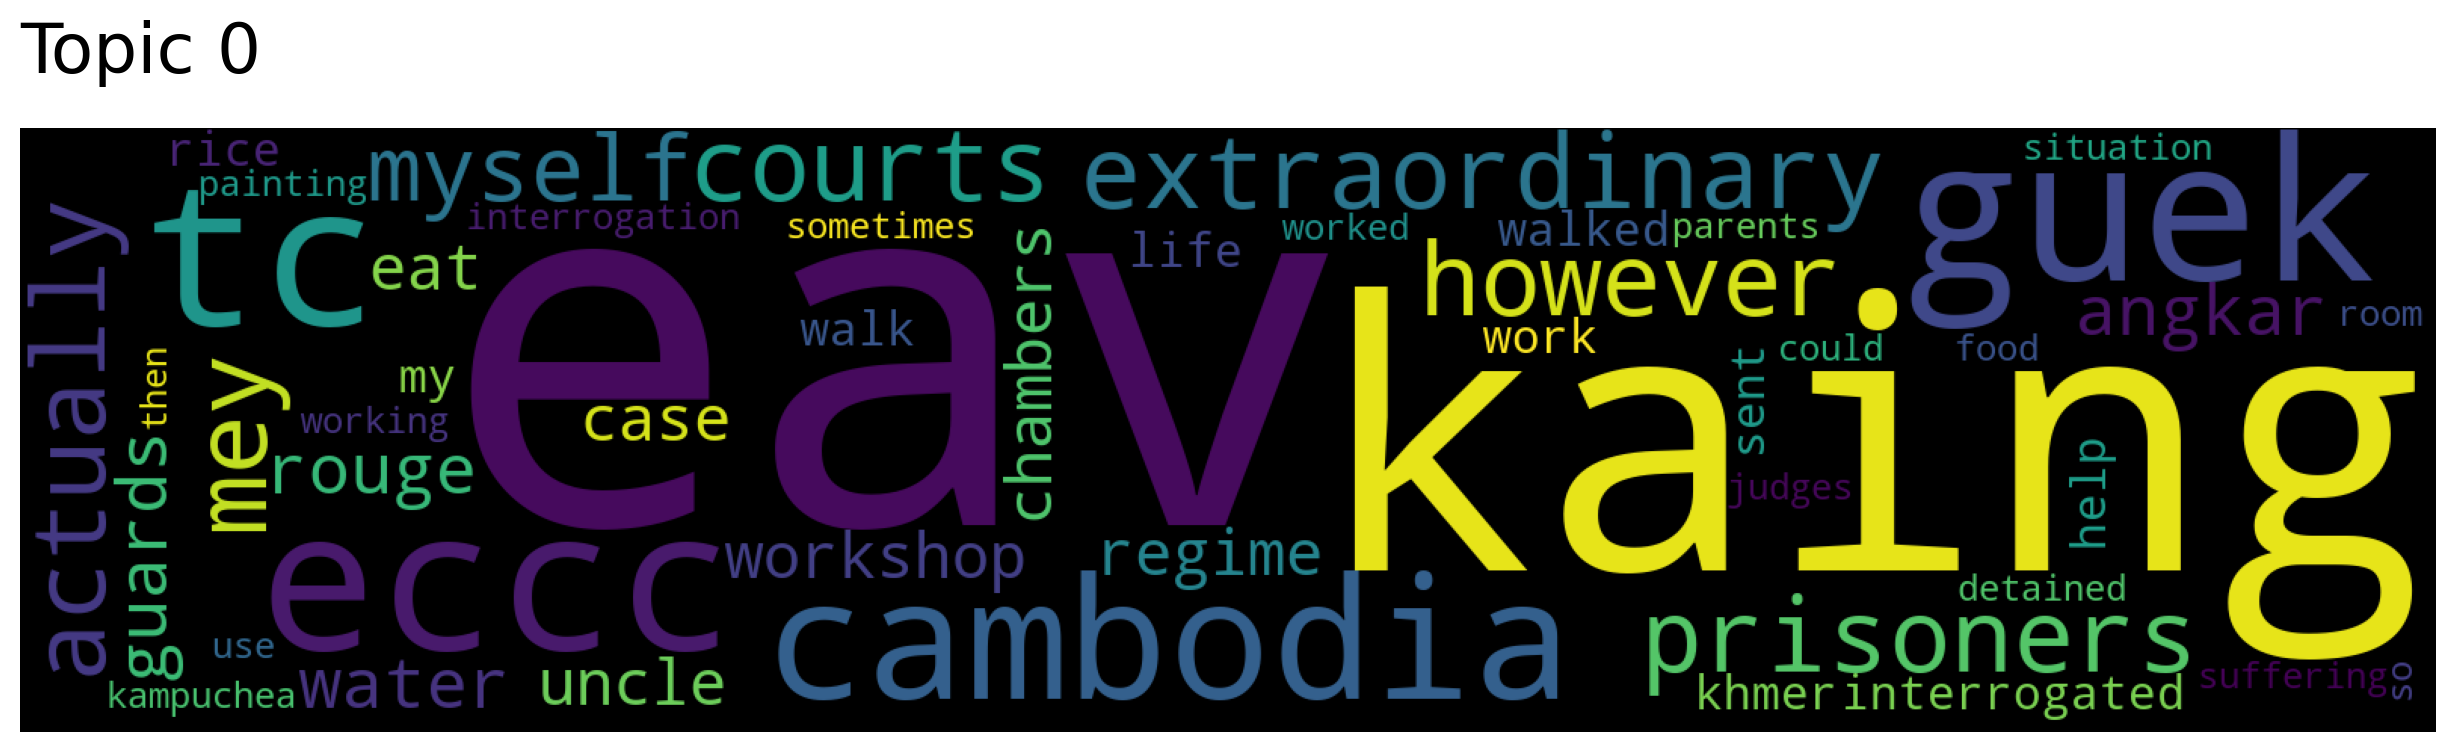

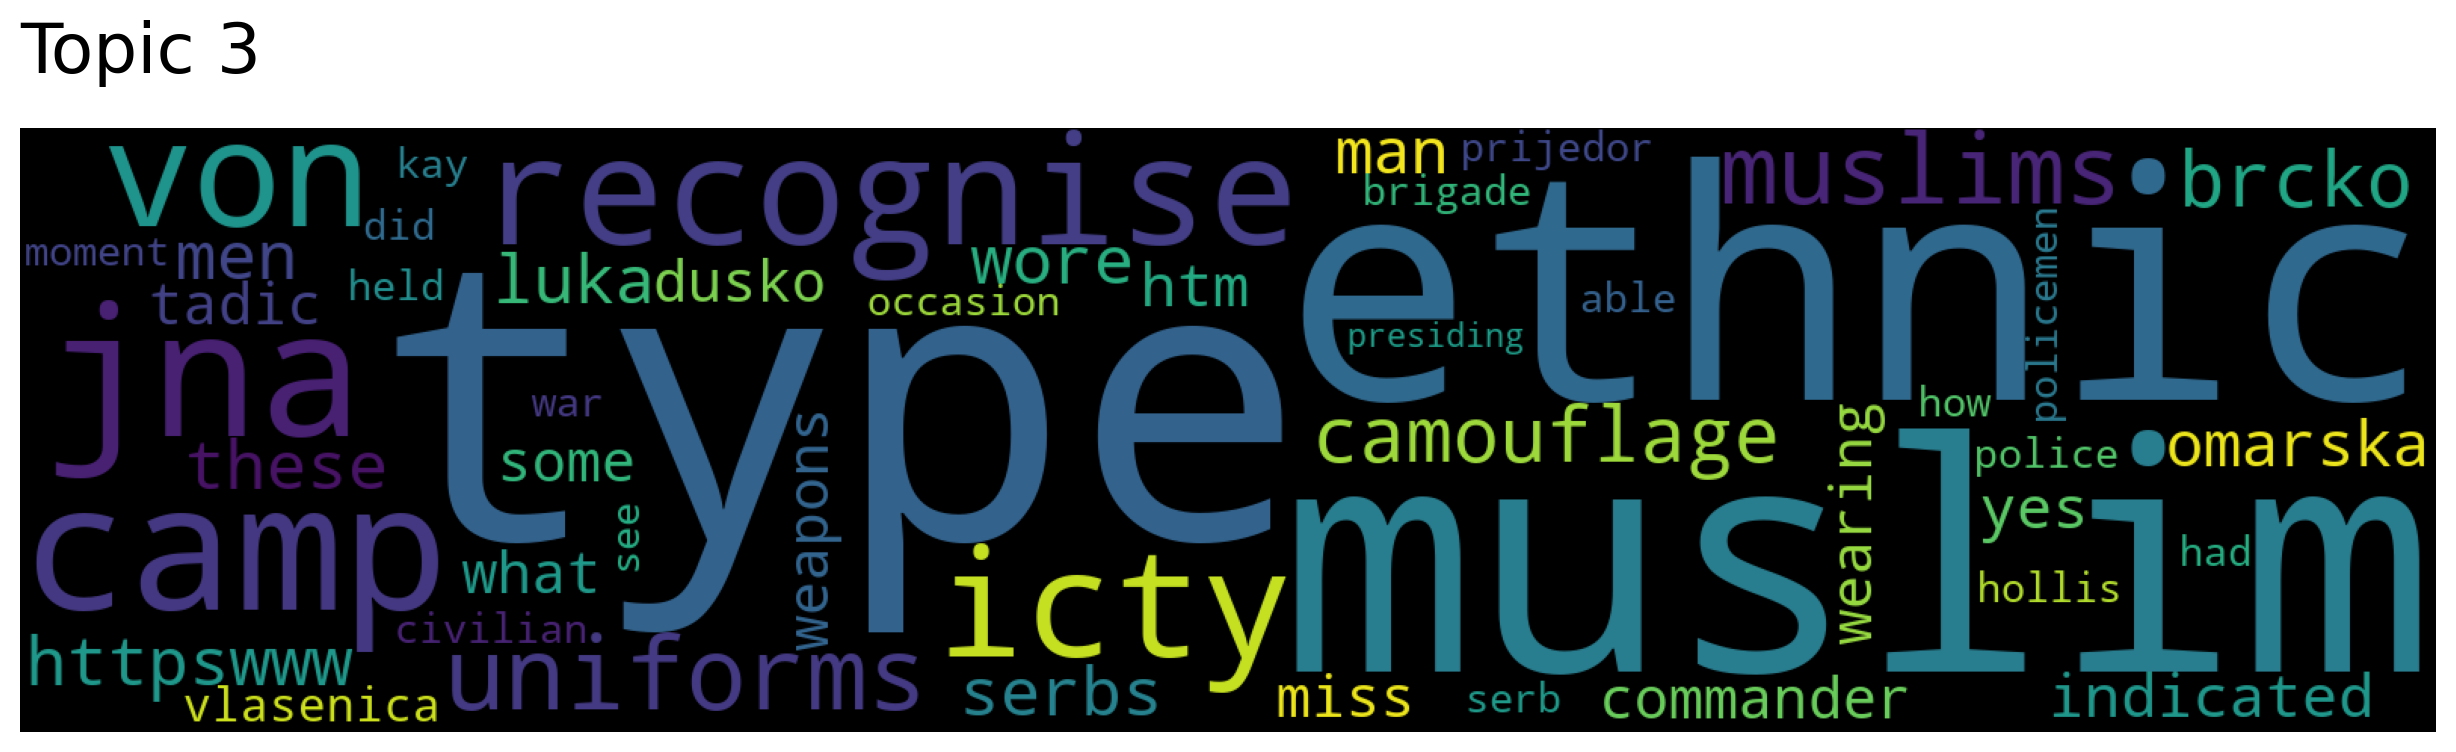

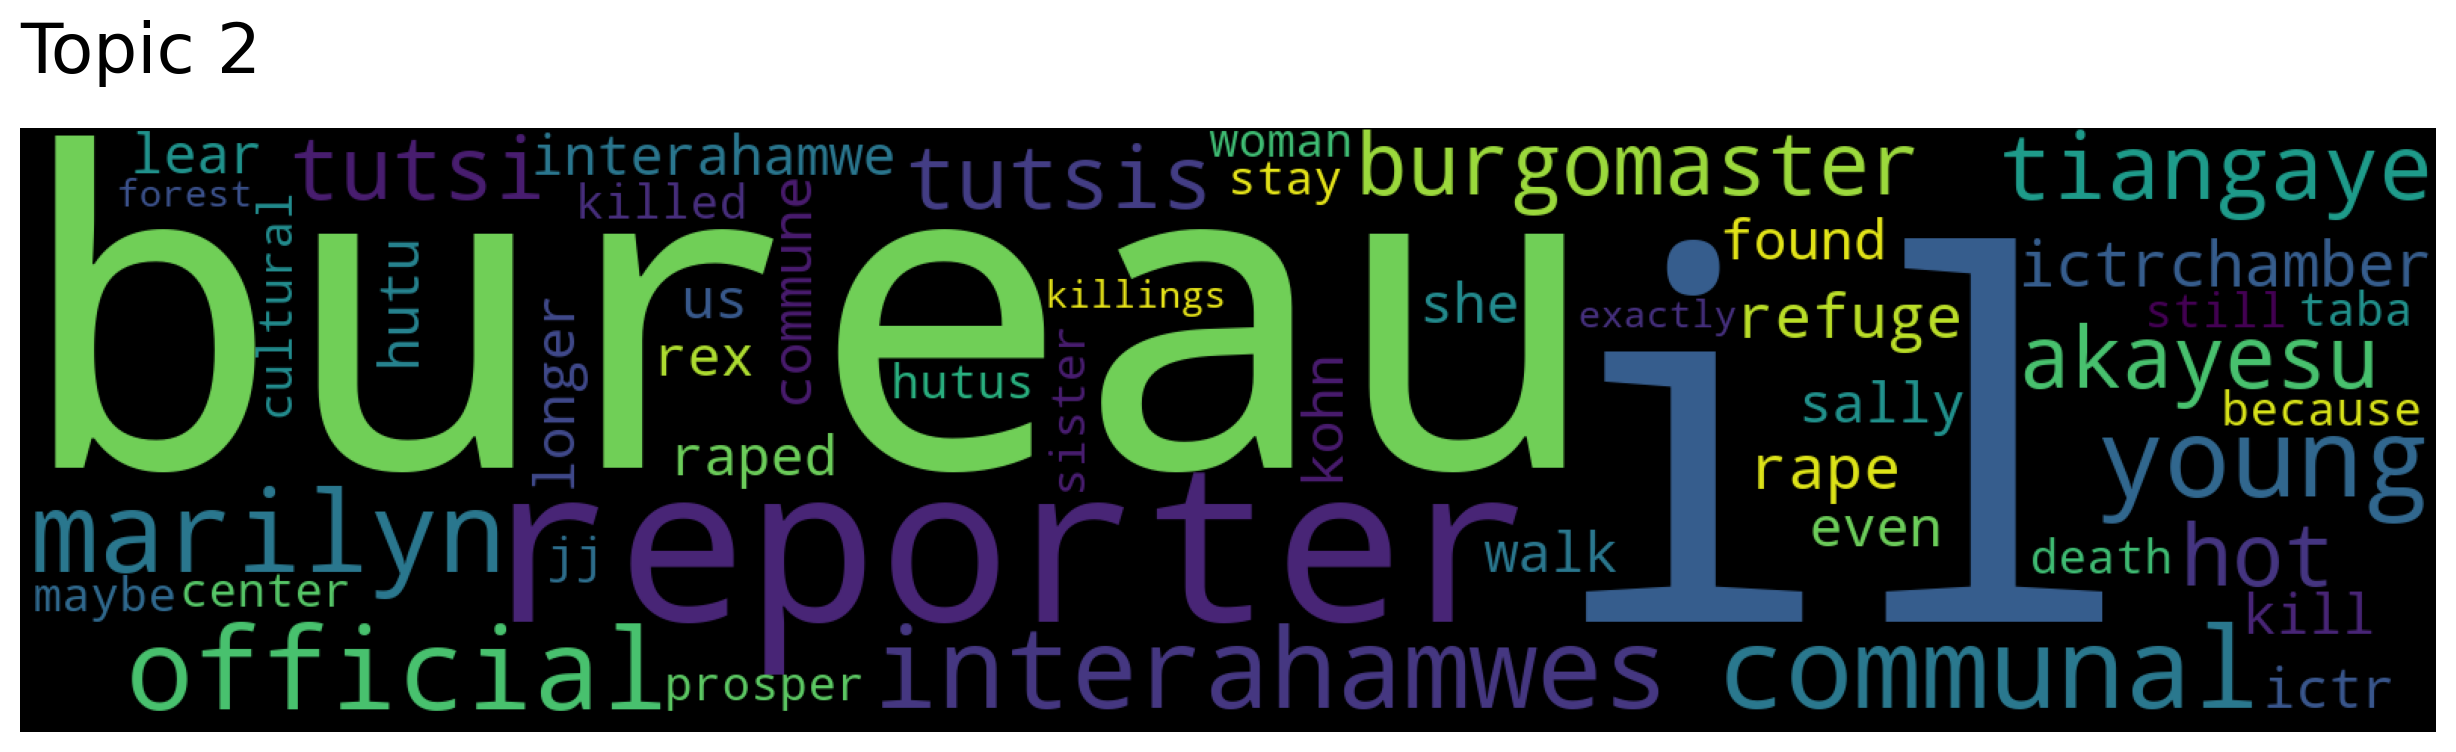

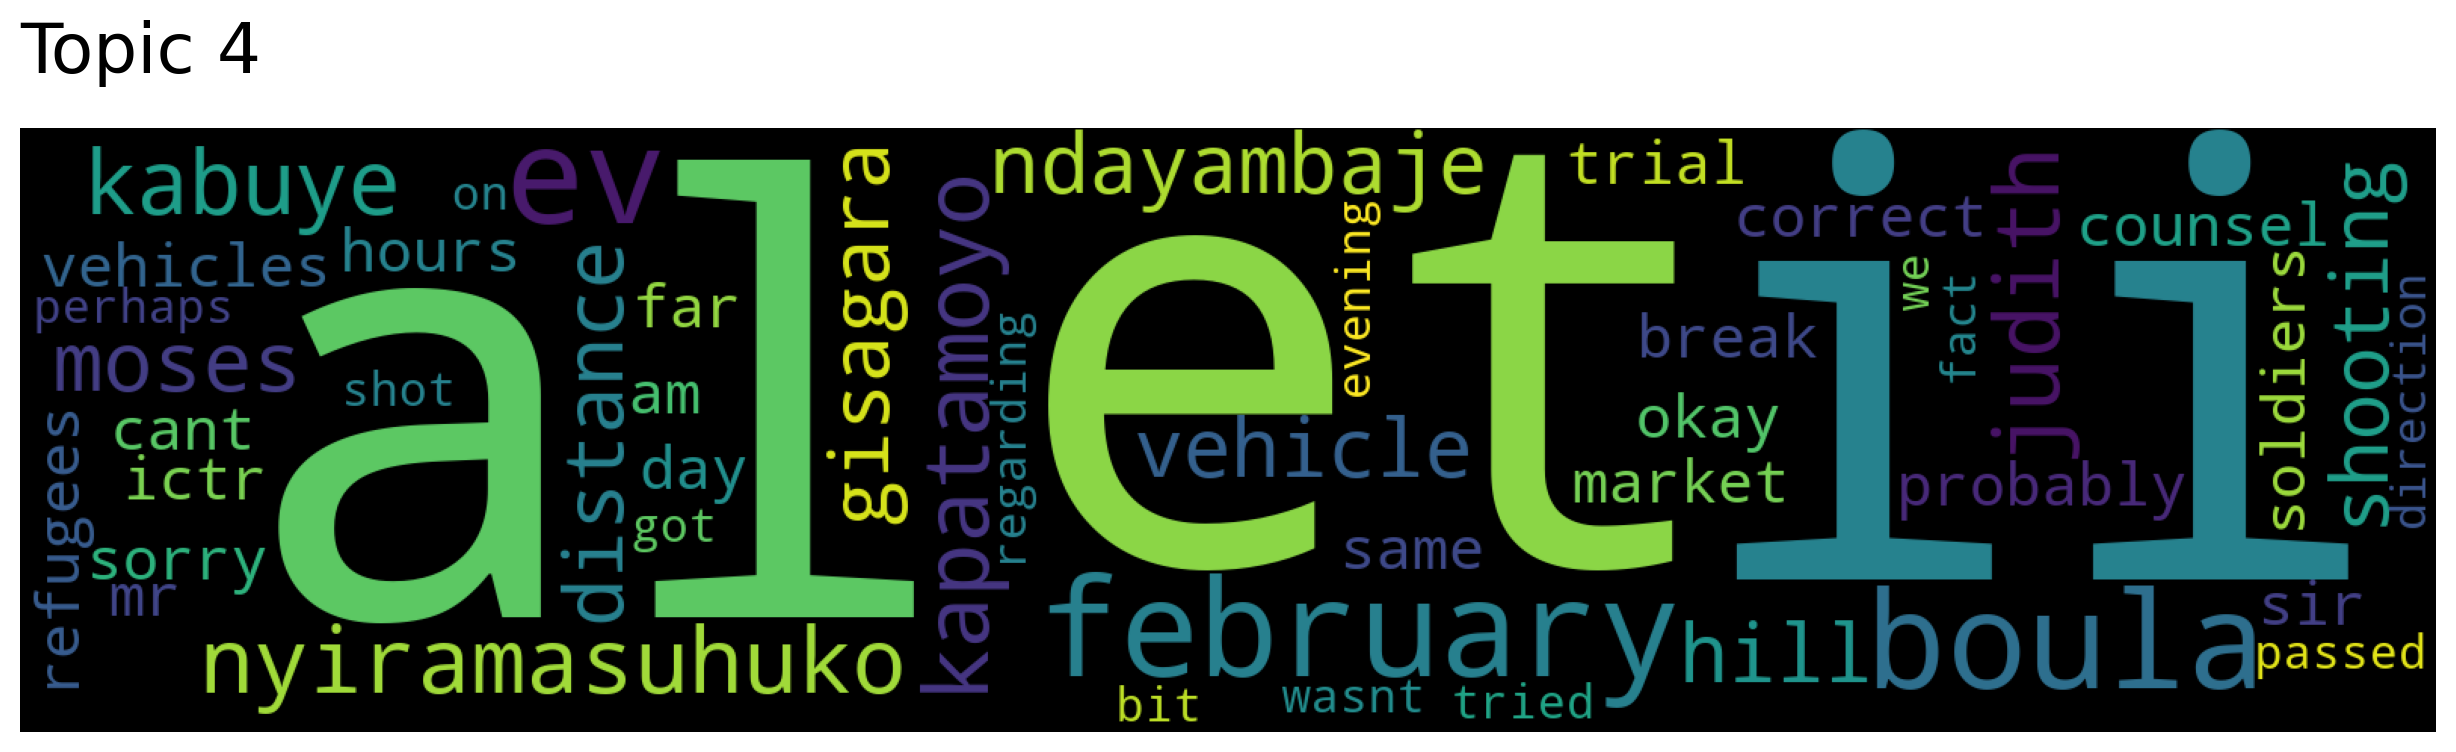

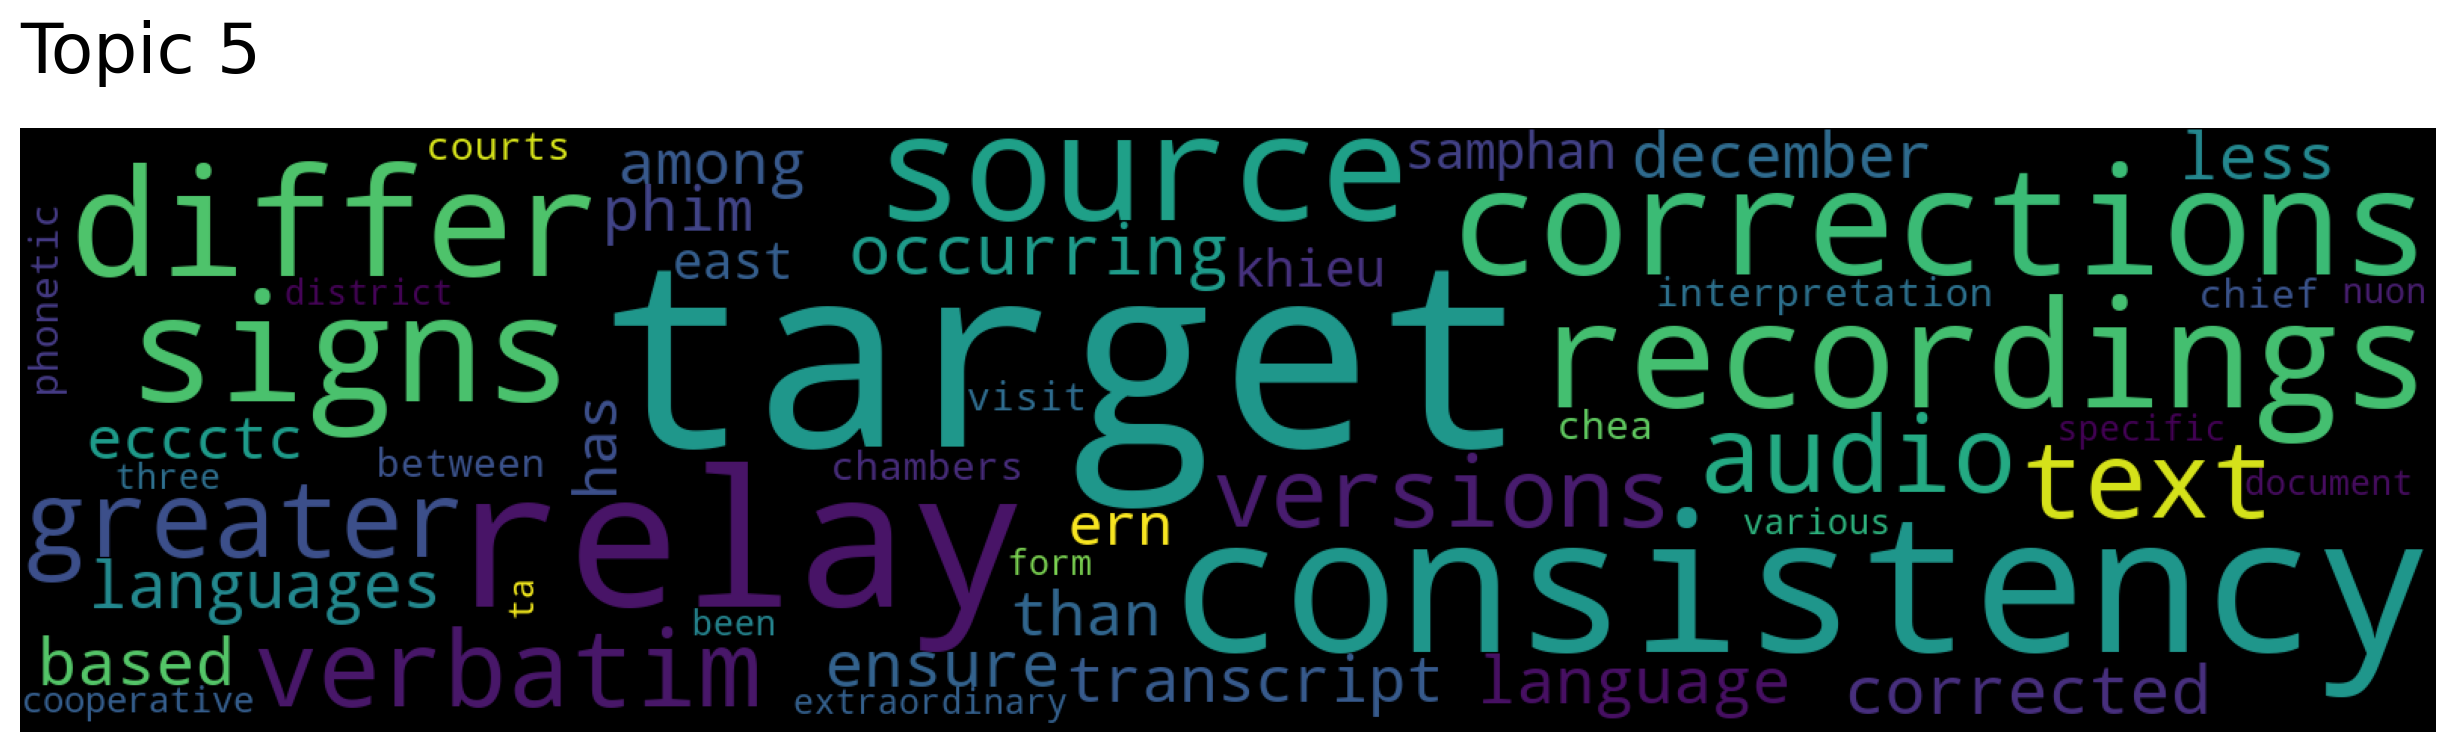

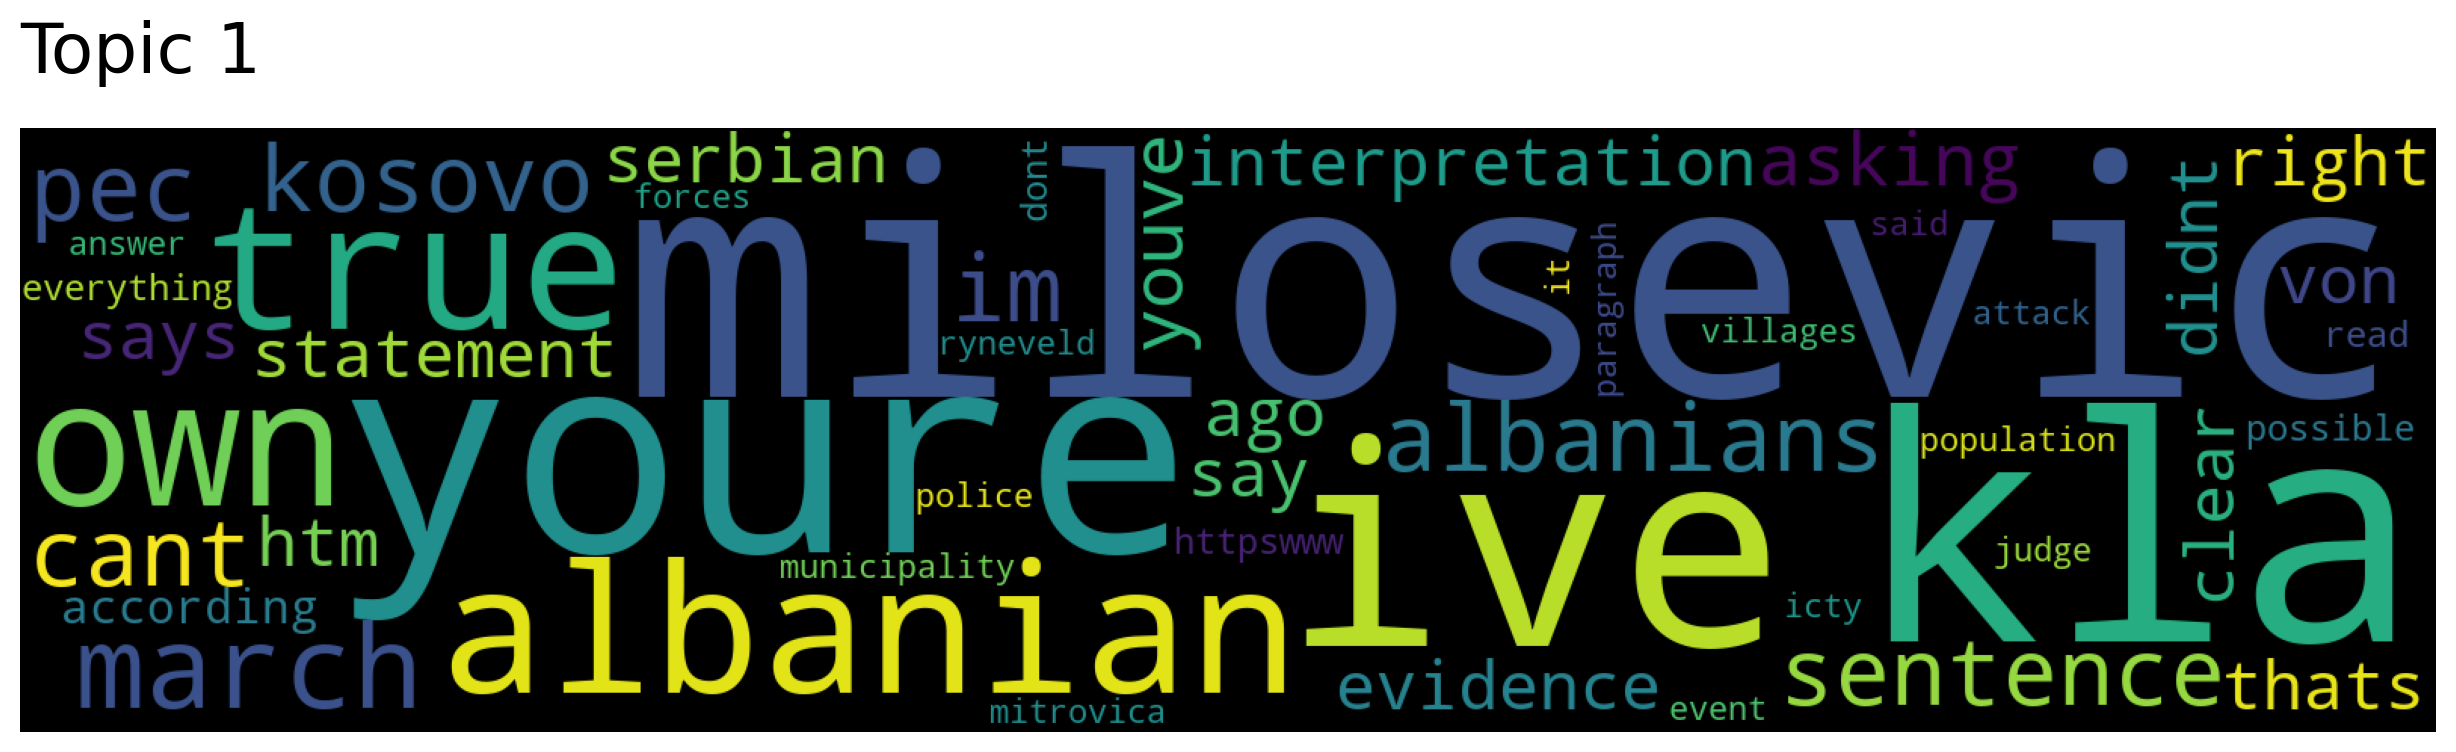

In [68]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

#### Paragraphs that belong just to violent cases

In [78]:
list_paragraphs_documents = [ paragraph for paragraph in df[df["label"]==1]["paragraph"] ]
print(f"Num of paragraphs is {len(list_paragraphs_documents)}")

model = Top2Vec(documents=list_paragraphs_documents, speed="learn", workers=8, min_count=5)

num_detected_topics = model.get_num_topics()
print(f'Num detected topics {num_detected_topics}')

# Get topic sizes (number of docs most similar to each topic)
topic_sizes, topic_nums = model.get_topic_sizes()
print(f"Topic sizes {topic_sizes}")
print(f"Topic nums {topic_nums}")

# Get Topics
topic_words, word_scores, topic_nums = model.get_topics(num_detected_topics)
print(f"Topic words {topic_words}")

2022-11-11 01:10:28,537 - top2vec - INFO - Pre-processing documents for training
2022-11-11 01:10:28,711 - top2vec - INFO - Creating joint document/word embedding


Num of paragraphs is 529


2022-11-11 01:10:34,127 - top2vec - INFO - Creating lower dimension embedding of documents
2022-11-11 01:10:36,516 - top2vec - INFO - Finding dense areas of documents
2022-11-11 01:10:36,531 - top2vec - INFO - Finding topics


Num detected topics 5
Topic sizes [187 178  81  49  34]
Topic nums [0 1 2 3 4]
Topic words [['il' 'reporter' 'official' 'interahamwes' 'bureau' 'communal' 'ictr'
  'marilyn' 'akayesu' 'tiangaye' 'found' 'burgomaster' 'kohn' 'sally'
  'interahamwe' 'young' 'commune' 'ictrchamber' 'hiding' 'hot' 'pursue'
  'lear' 'kill' 'tutsi' 'killing' 'exactly' 'where' 'hutu' 'rex' 'didna'
  'tutsis' 'ber' 'marry' 'refuge' 'qo' 'below' 'prevent' 'ia' 'rape'
  'going' 'talked' 'pardon' 'bave' 'bouse' 'taba' 'aa' 'killed' 'sorghum'
  'saying' 'raping']
 ['extraordinary' 'courts' 'cambodia' 'chambers' 'case' 'trial' 'guek'
  'eccc' 'kaing' 'eav' 'tc' 'walked' 'could' 'khmer' 'ration' 'scared'
  'my' 'detained' 'eccctc' 'angkar' 'blindfolded' 'so' 'presume' 'cried'
  'scarf' 'only' 'rouge' 'prisoners' 'lawyer' 'penh' 'sometime'
  'inflicted' 'later' 'tuol' 'thirsty' 'experience' 'however' 'duch'
  'walking' 'phnom' 'then' 'sent' 'sick' 'collect' 'shackled' 'pot'
  'toward' 'tree' 'walk' 'separate']
 ['mil

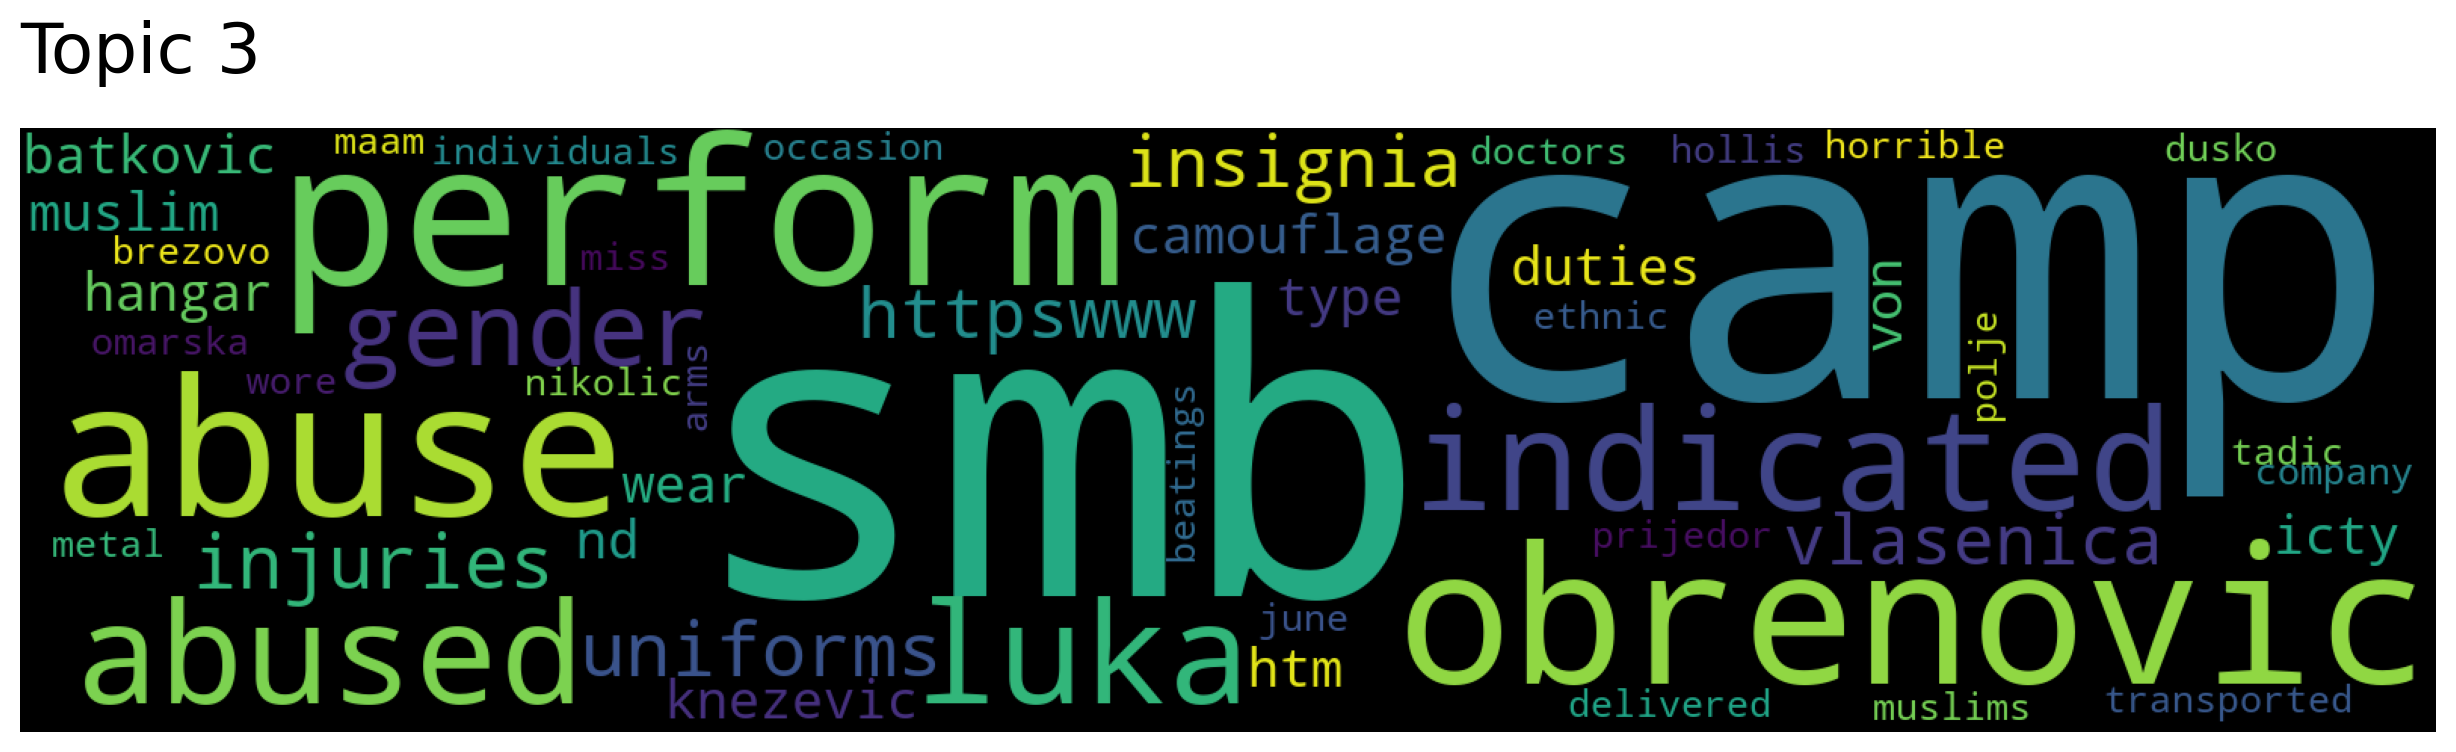

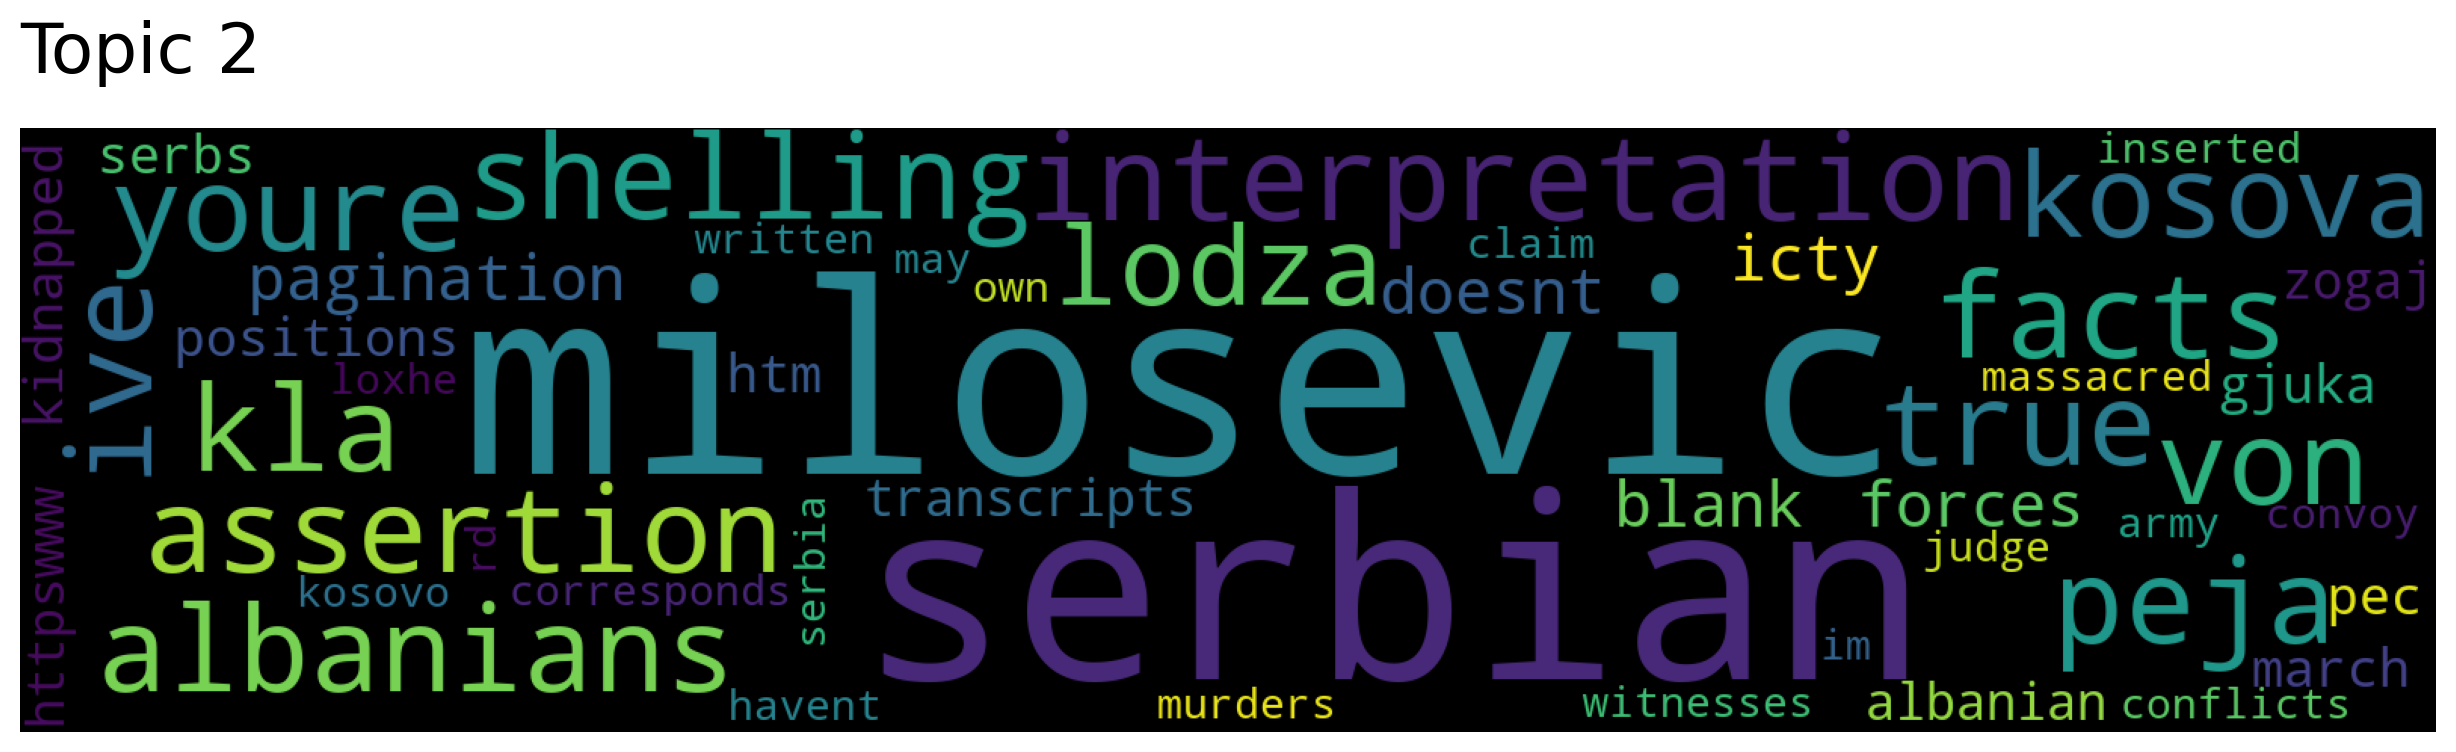

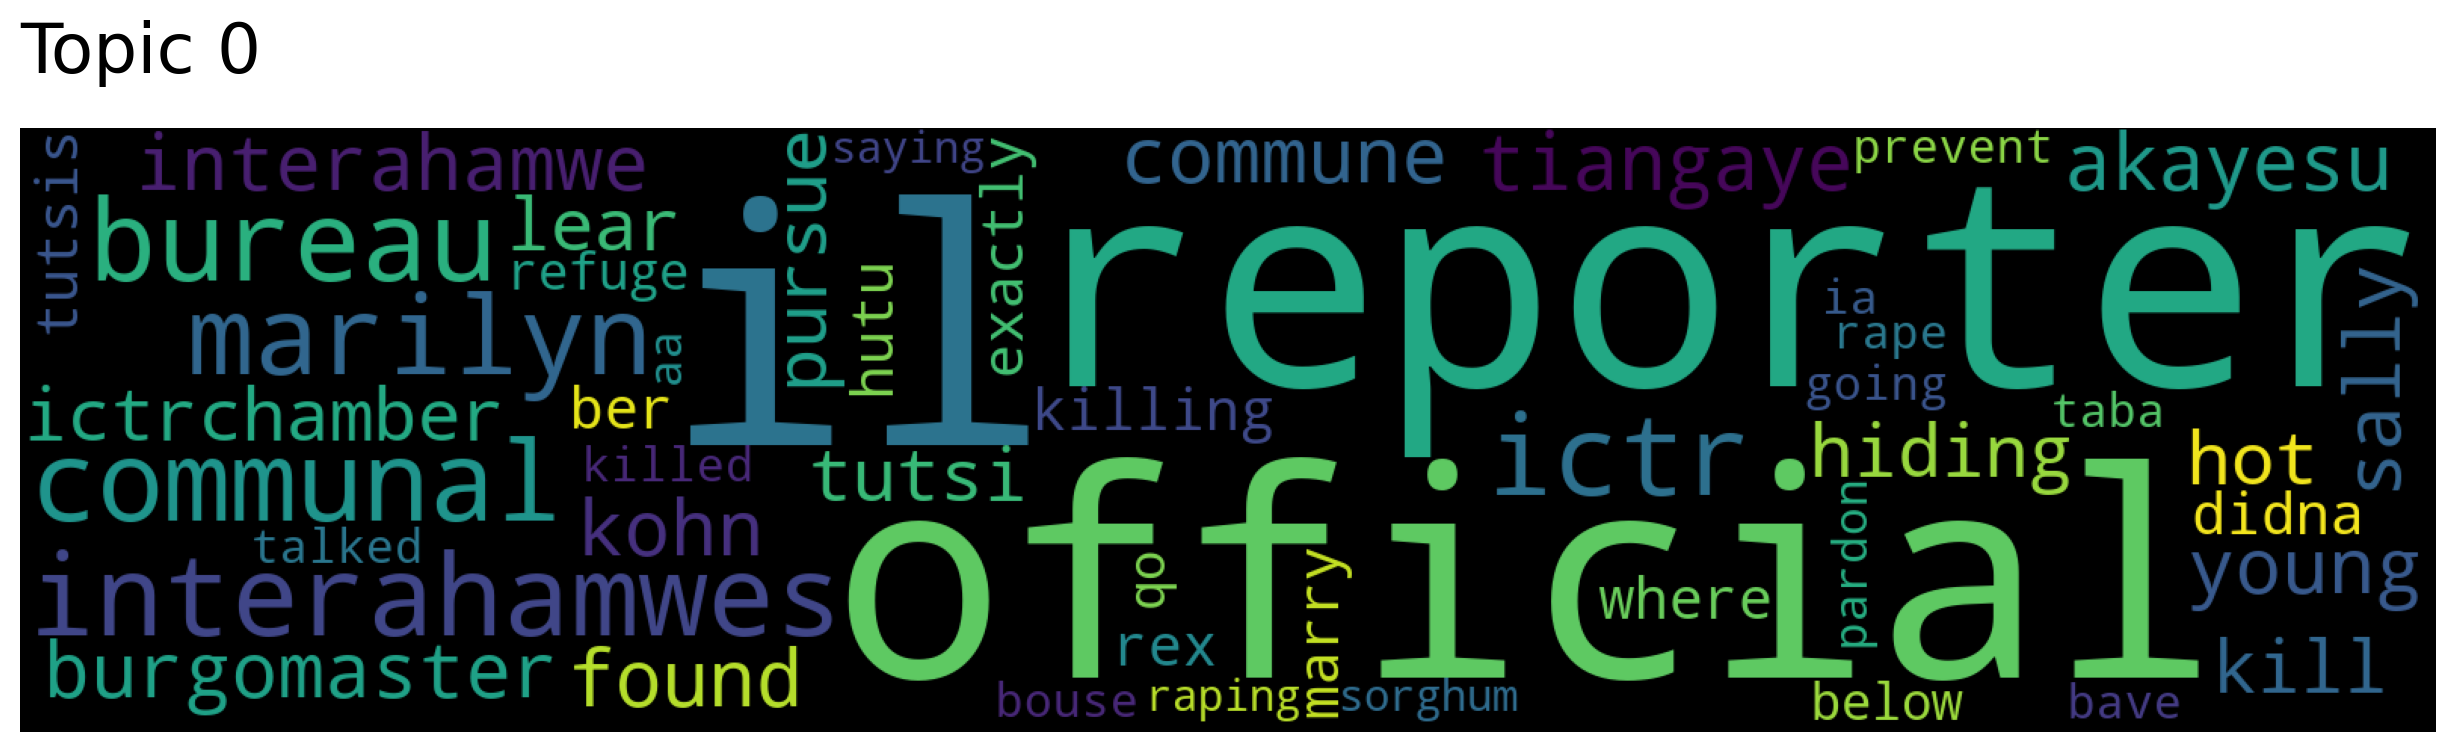

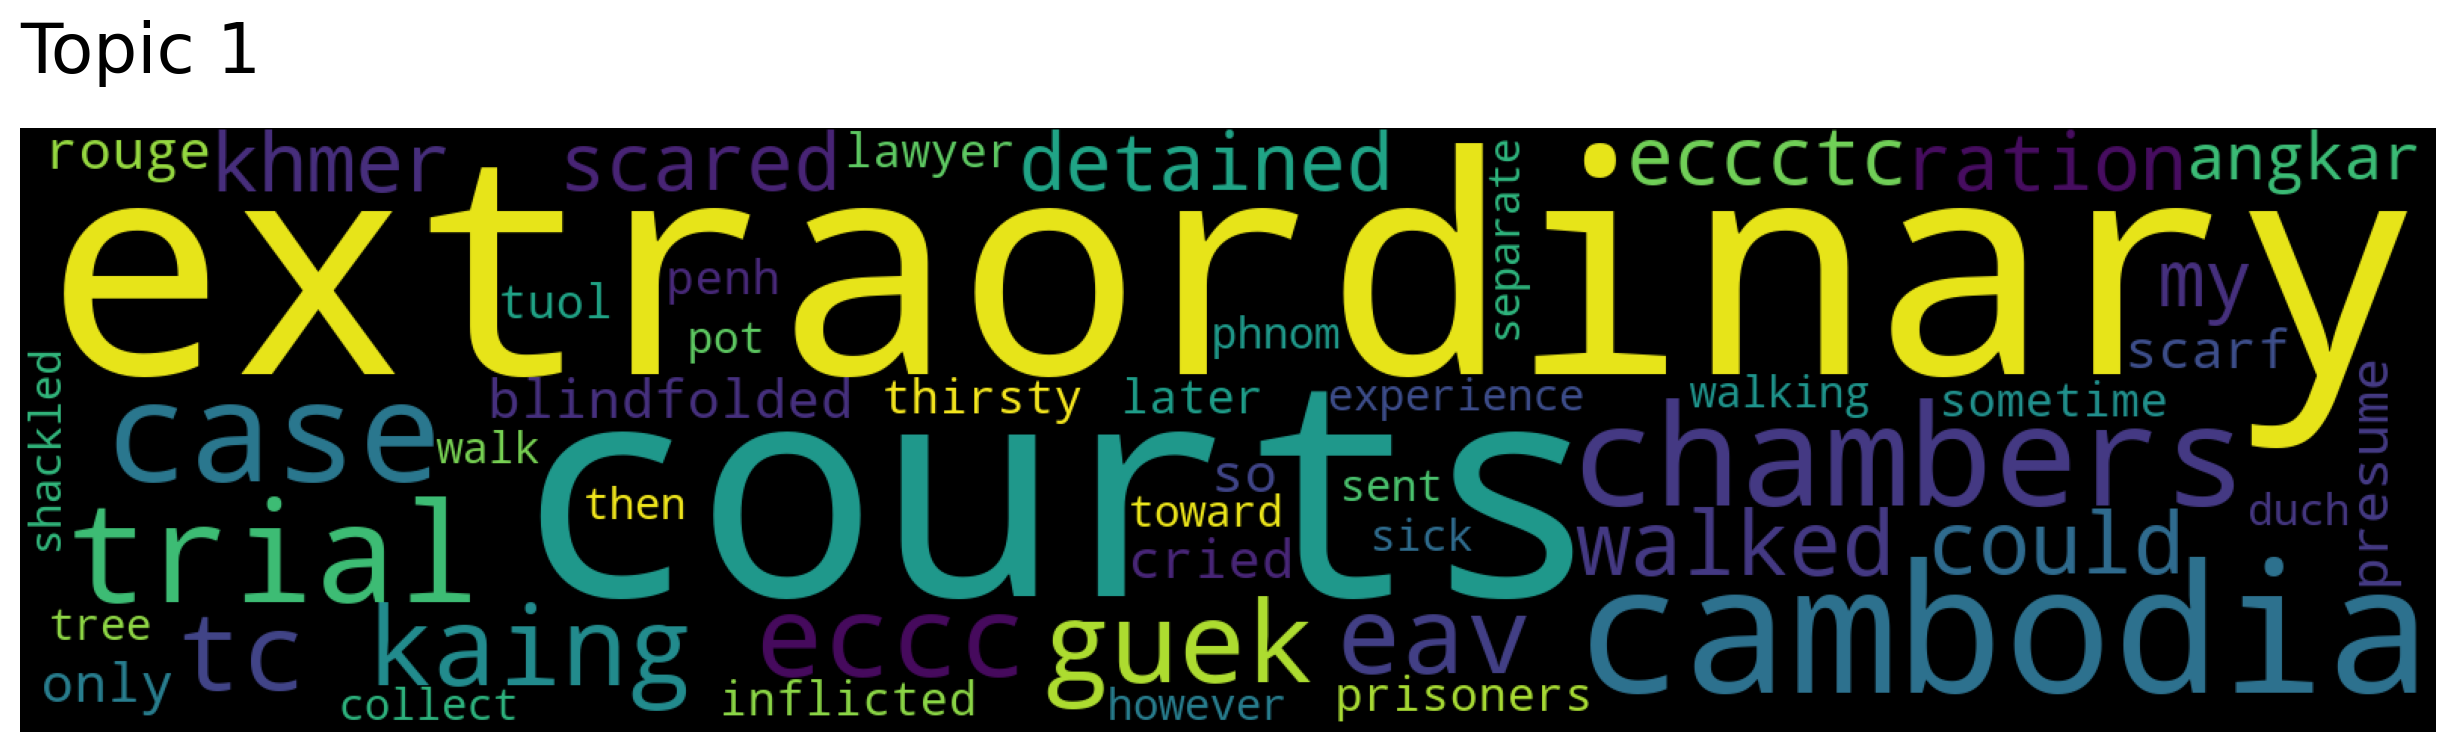

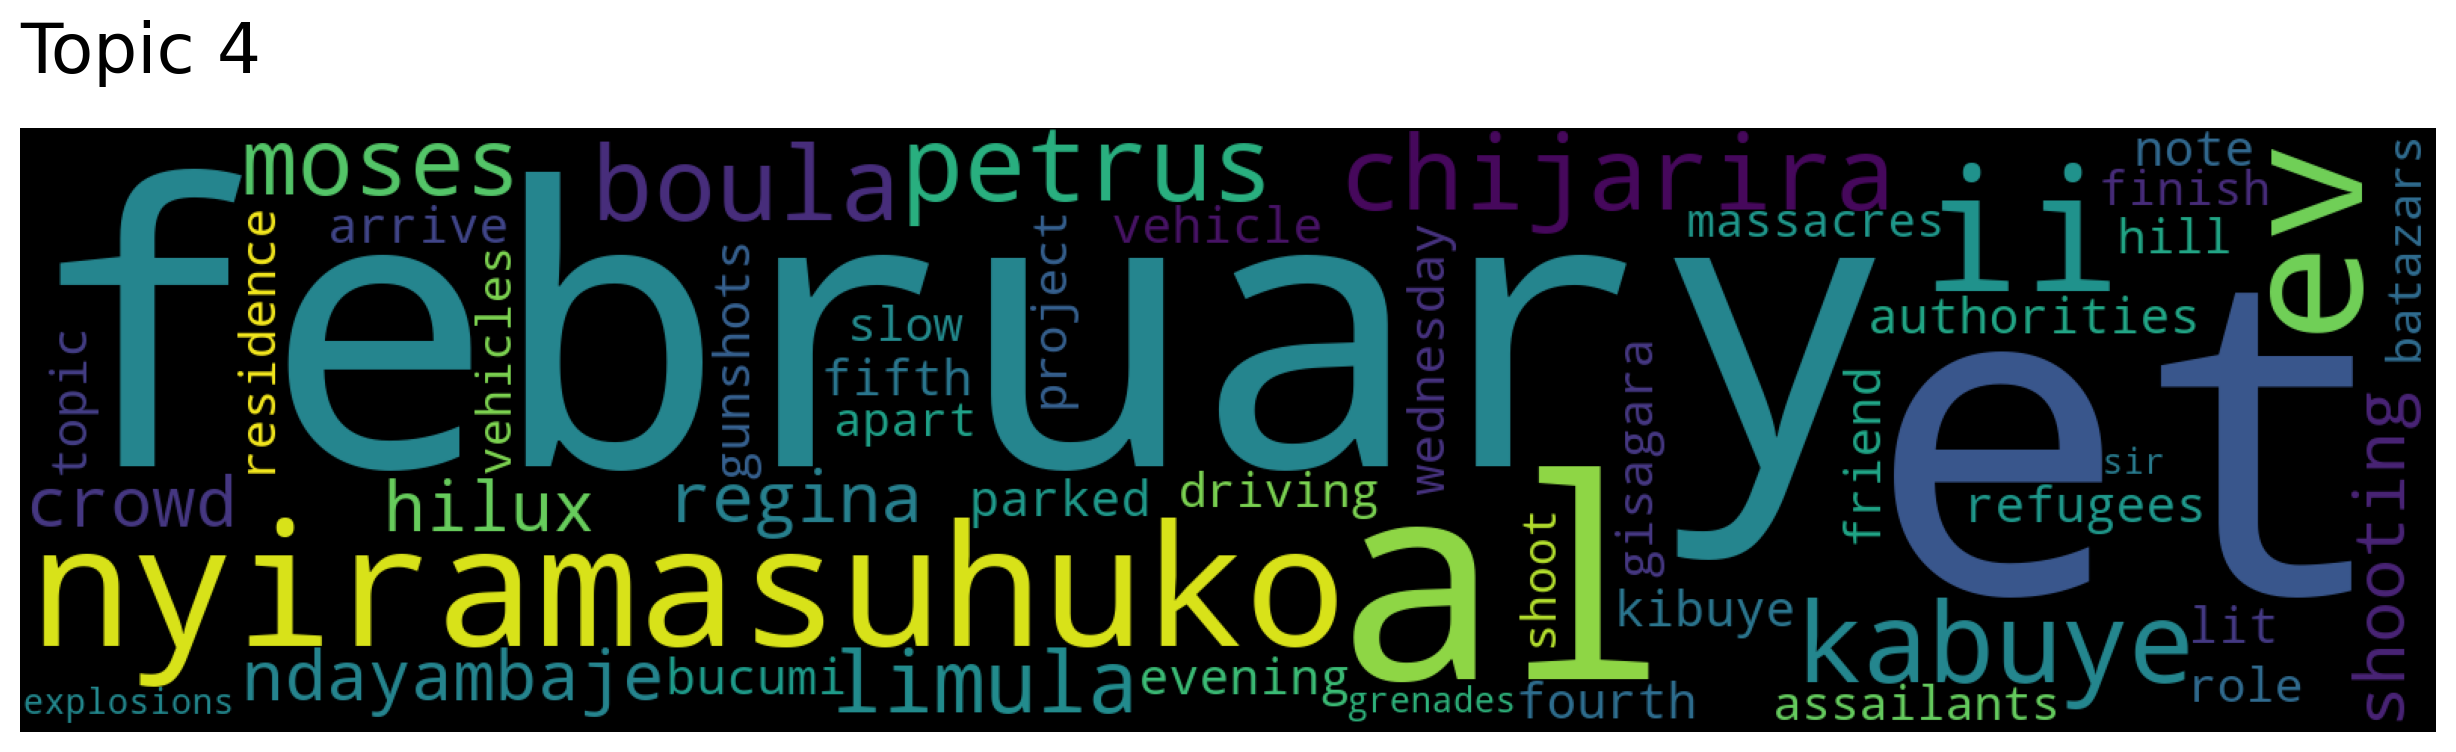

In [79]:
# Search topics
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["muslim"], num_topics=num_detected_topics)

for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [80]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 199, Score: 0.7007644772529602
-----------
people would be coming held there Q During the time that you were at Batkovic were there other detainees A When I arrived in the camp of Batkovic were all the people who were all the people that left Vlasenica before Q While you were at Batkovic were you yourself mistreated A The abuse started the from the moment we arrived Q What happened when you arrived A On our arrival they made us run the gauntlet We each and every one of us had to run it They would beat us up until to the door and then they would call a row and we had to go one by one to the corner of the hangar Then they called the row once again according to the list and then we had to run the same type of gauntlet and then line up by the wall Q These people between whom you were running the people who were beating you what were they wearing Page A They wore SMB uniforms camouflage uniforms They were dressed in a von  IT httpswww icty orgxcasestadictransen IT htm different wa

## Analysis when performing own pre-processing (performing stop-words removal but without stemming or lemmatization)

In [81]:
import utilities_project as utilities

In [82]:
list_preproc_steps = list()
list_preproc_steps.append(utilities.PreprocessingText.LOWER_CASE)
list_preproc_steps.append(utilities.PreprocessingText.PUNCT_REGEX)
list_preproc_steps.append(utilities.PreprocessingText.PUNCTUATION)
list_preproc_steps.append(utilities.PreprocessingText.NUMBERS)
list_preproc_steps.append(utilities.PreprocessingText.STOP_WORDS)
list_preproc_steps.append(utilities.PreprocessingText.REMOVE_URL)

print(list_preproc_steps)

[<PreprocessingText.LOWER_CASE: 1>, <PreprocessingText.PUNCT_REGEX: 2>, <PreprocessingText.PUNCTUATION: 3>, <PreprocessingText.NUMBERS: 4>, <PreprocessingText.STOP_WORDS: 5>]


In [95]:
#import importlib
#importlib.reload(utilities)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/iolguin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


<module 'utilities_project' from '/home/iolguin/Documents/TUM/Semester05/IDP/AutomatedTraumaDetectionInGCT/utilities_project.py'>

In [96]:
df_violent = df[df["label"]==1]["paragraph"]
list_paragraphs_documents = [ utilities.pre_processing_sentence(paragraph, list_preproc_steps) for paragraph in df_violent ]

In [97]:
list_paragraphs_documents[0:3]

['militia tie asked wrong said know instruction arrest cooperative prison sent rice barn shackled leg type shackle used know time quite later took walked rode oxcart midnight placed samrong pagoda samrong pagoda popular detention site sector detained together another cousin mine say sarak stayed overnight interrogated morning next day heard sound motorbike honda motorbike prison fact bible hall part pagoda opened door called name heng nath name time heng actually name godfather used surname heng nath actually father vann sam godson used name surname heng nath know khmer rouge regime name called raised hand took',
 'extraordinary chamber court cambodia trial chamber trial day case eccc tc kaing guek eav page prison guard told go resolve matter asked guard said need talk know go meet resolve matter decide let go could go back home placed honda motorbike sarak rider militiaman ak rifle behind u cuffed rode left pagoda kandal pagoda along songke river know kandal pagoda also prison arrived

In [98]:
model = Top2Vec(documents=list_paragraphs_documents, speed="learn", workers=10, min_count=5)

2022-11-11 01:25:02,826 - top2vec - INFO - Pre-processing documents for training
2022-11-11 01:25:02,929 - top2vec - INFO - Creating joint document/word embedding
2022-11-11 01:25:05,724 - top2vec - INFO - Creating lower dimension embedding of documents
2022-11-11 01:25:07,843 - top2vec - INFO - Finding dense areas of documents
2022-11-11 01:25:07,857 - top2vec - INFO - Finding topics


In [99]:
num_topics = model.get_num_topics()
num_topics

5

Topic sizes [185 179  79  51  35]
Topic nums [0 1 2 3 4]
Topic words [['il' 'official' 'pursue' 'communal' 'tutsi' 'bureau' 'reporter'
  'attestation' 'qo' 'interahamwe' 'marilyn' 'contradiction' 'replied'
  'someone' 'caught' 'didna' 'hutu' 'doesna' 'burgomaster' 'pgs'
  'tiangaye' 'ictr' 'ruin' 'qa' 'married' 'aa' 'akayesu' 'ictrchamber'
  'hot' 'hidden' 'pardon' 'lear' 'ber' 'field' 'ia' 'hiding' 'exactly'
  'refuge' 'bouse' 'sally' 'prevent' 'talked' 'rex' 'sought' 'tape'
  'raping' 'rural' 'sorghum' 'marry' 'organ']
 ['extraordinary' 'cambodia' 'case' 'trial' 'january' 'scarf' 'eav'
  'guek' 'tc' 'tie' 'eccc' 'court' 'kaing' 'elaborate' 'already' 'hold'
  'placed' 'pot' 'detention' 'walked' 'chamber' 'artist' 'angkar'
  'kicked' 'biography' 'ration' 'tuol' 'experience' 'palm' 'feeling'
  'altogether' 'later' 'scared' 'sleng' 'instructed' 'photographed'
  'location' 'pig' 'screaming' 'moved' 'sometime' 'collect' 'seng'
  'could' 'tied' 'skin' 'bech' 'shackled' 'real' 'kick']
 ['mil

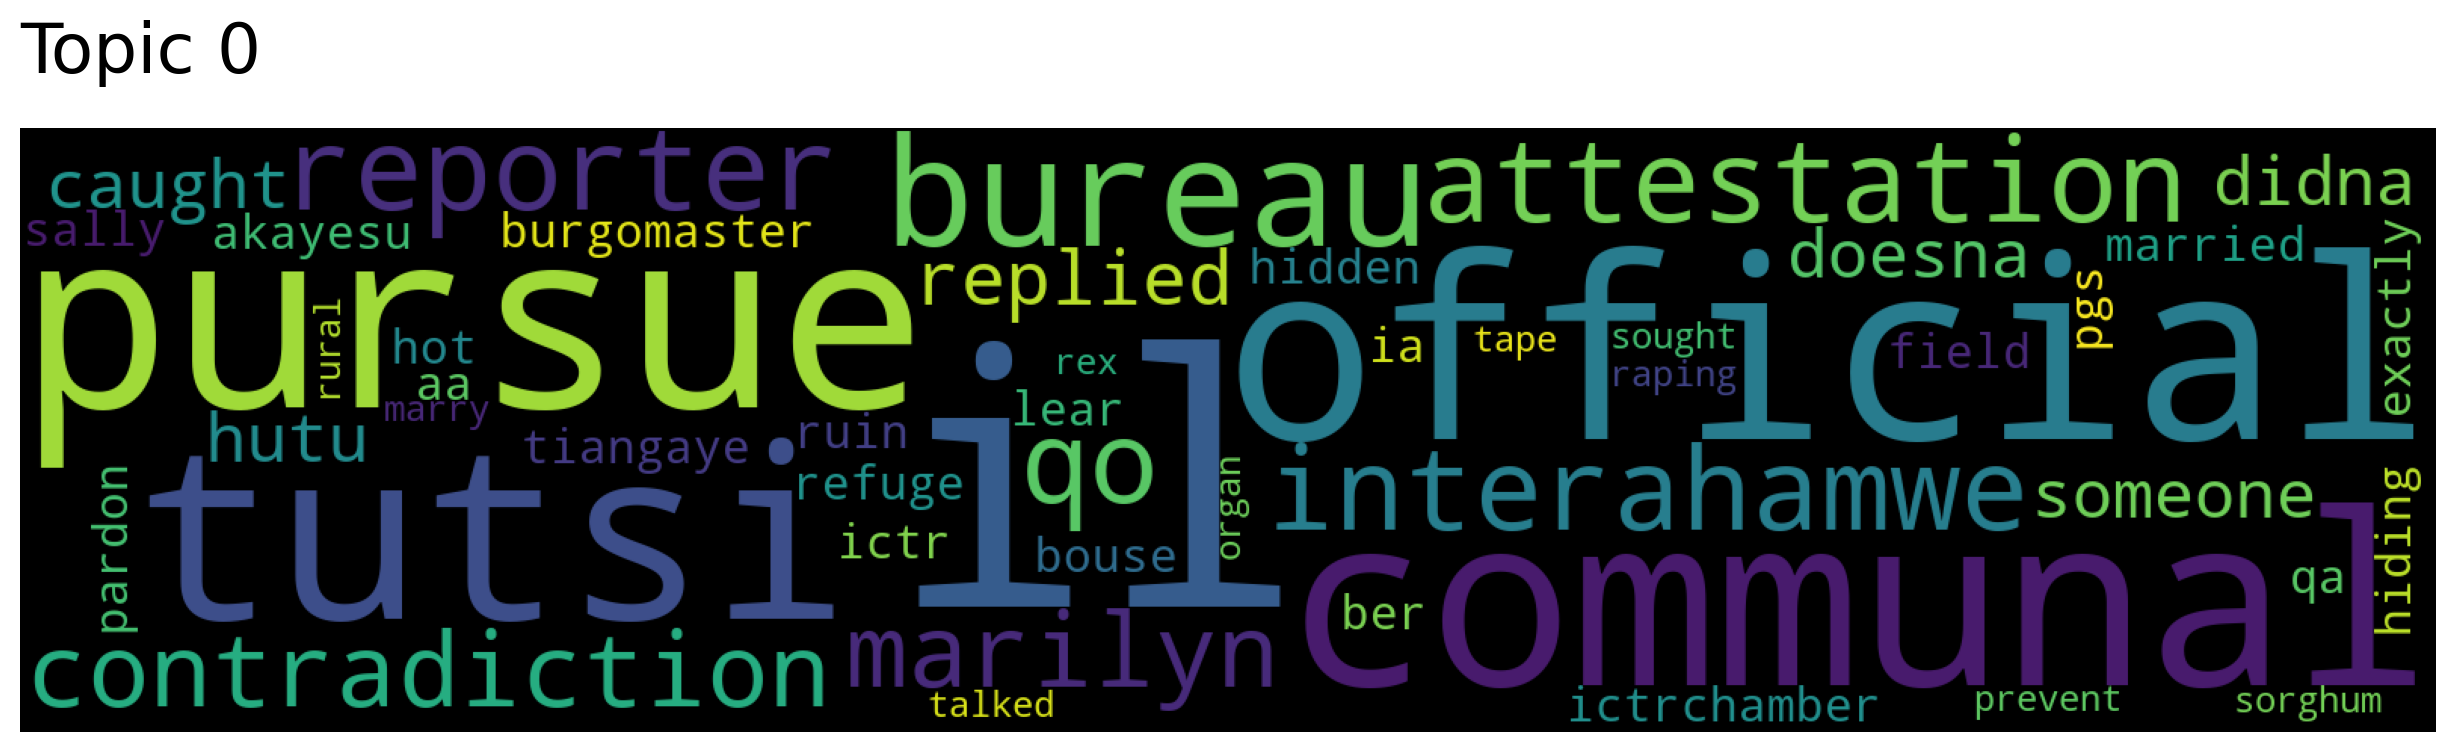

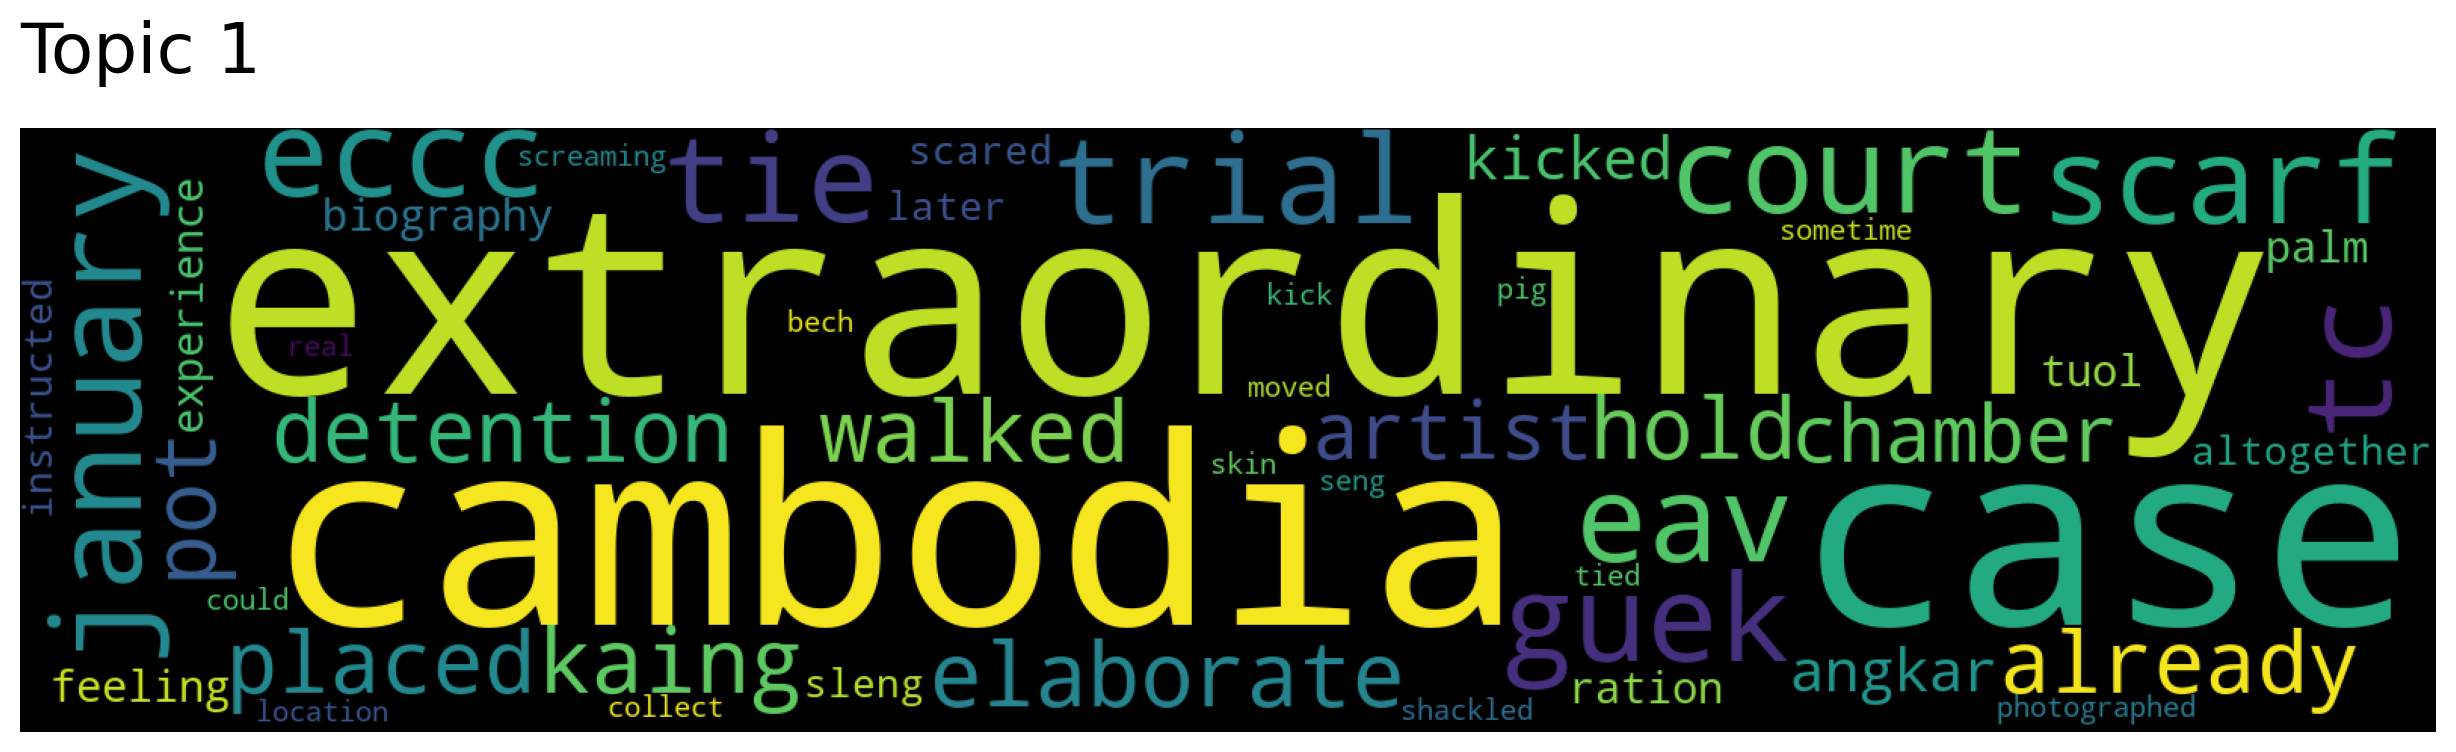

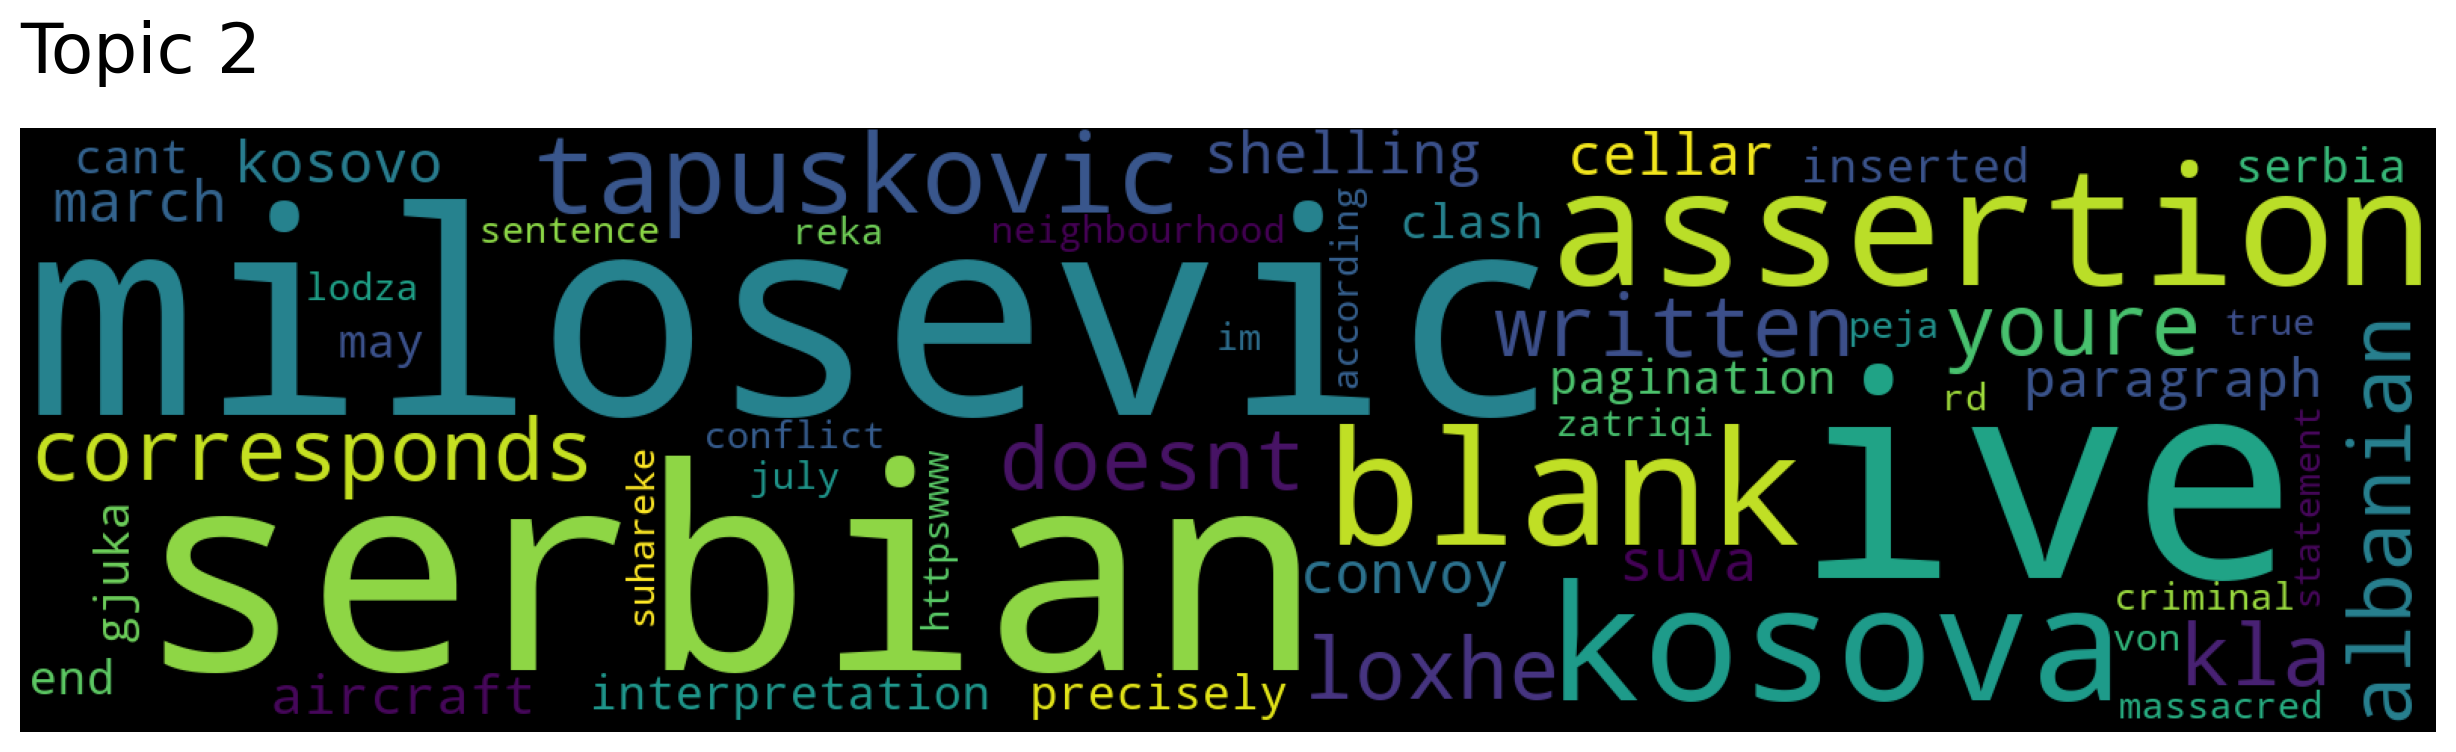

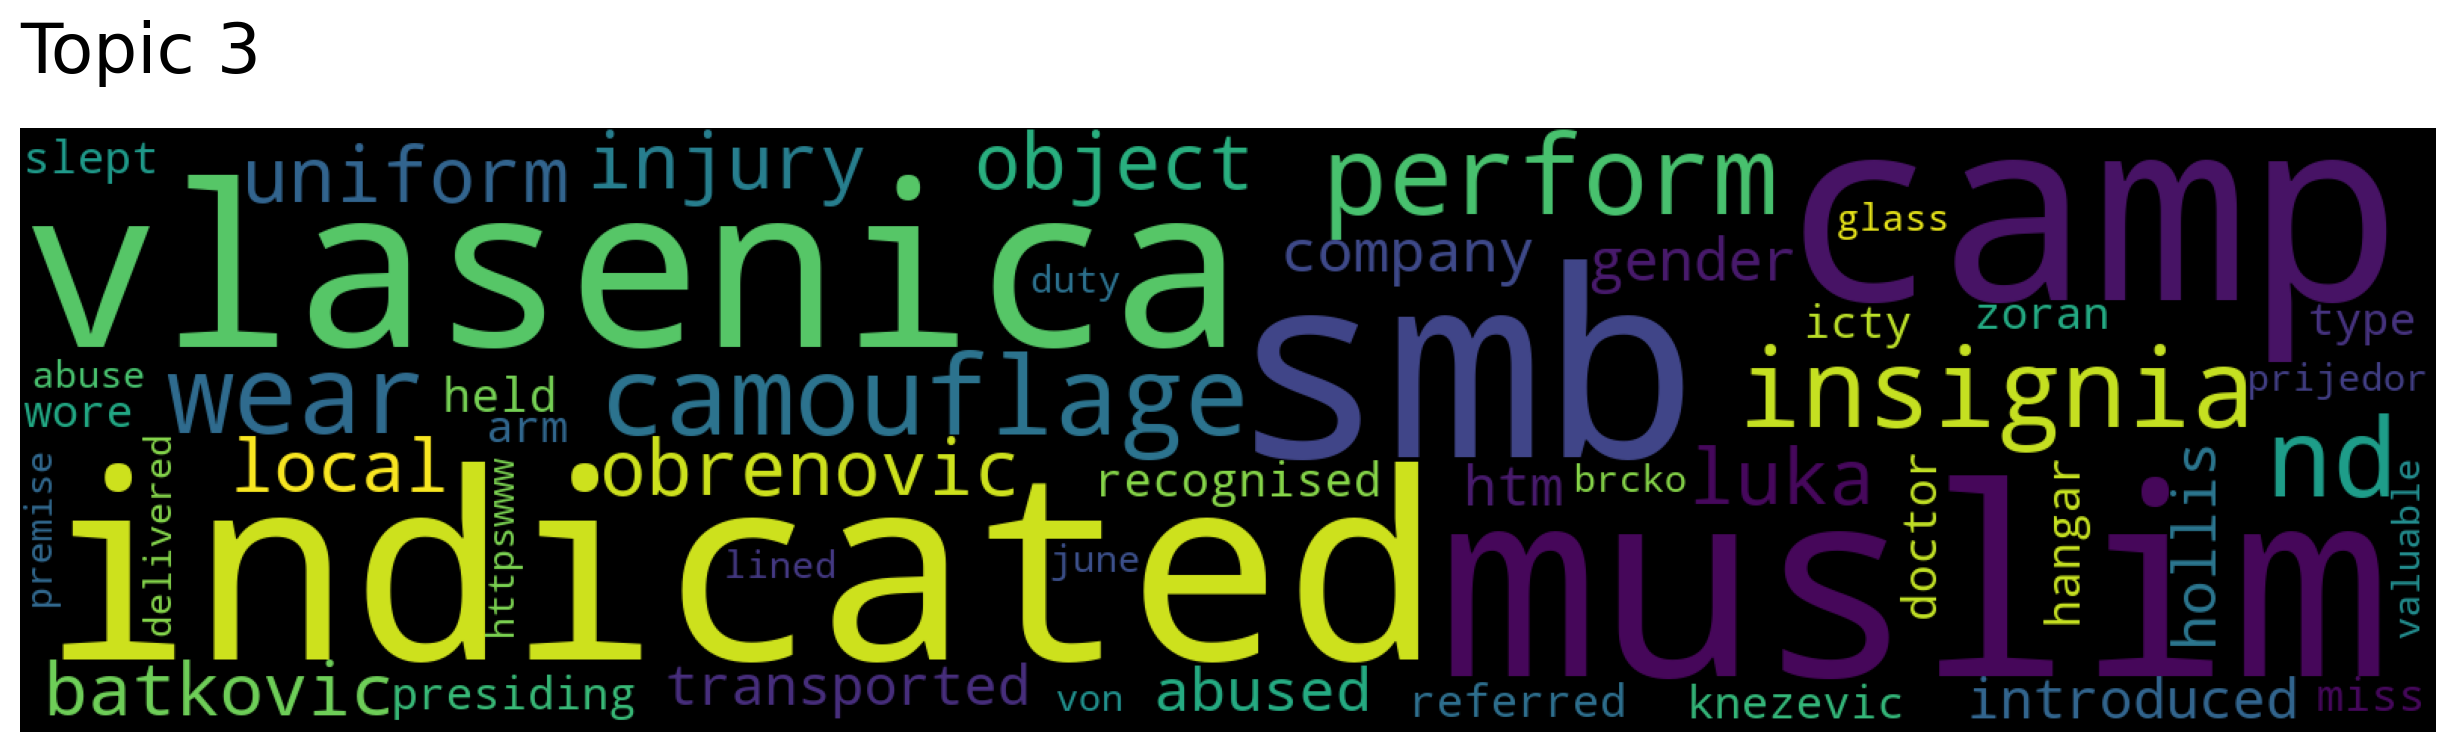

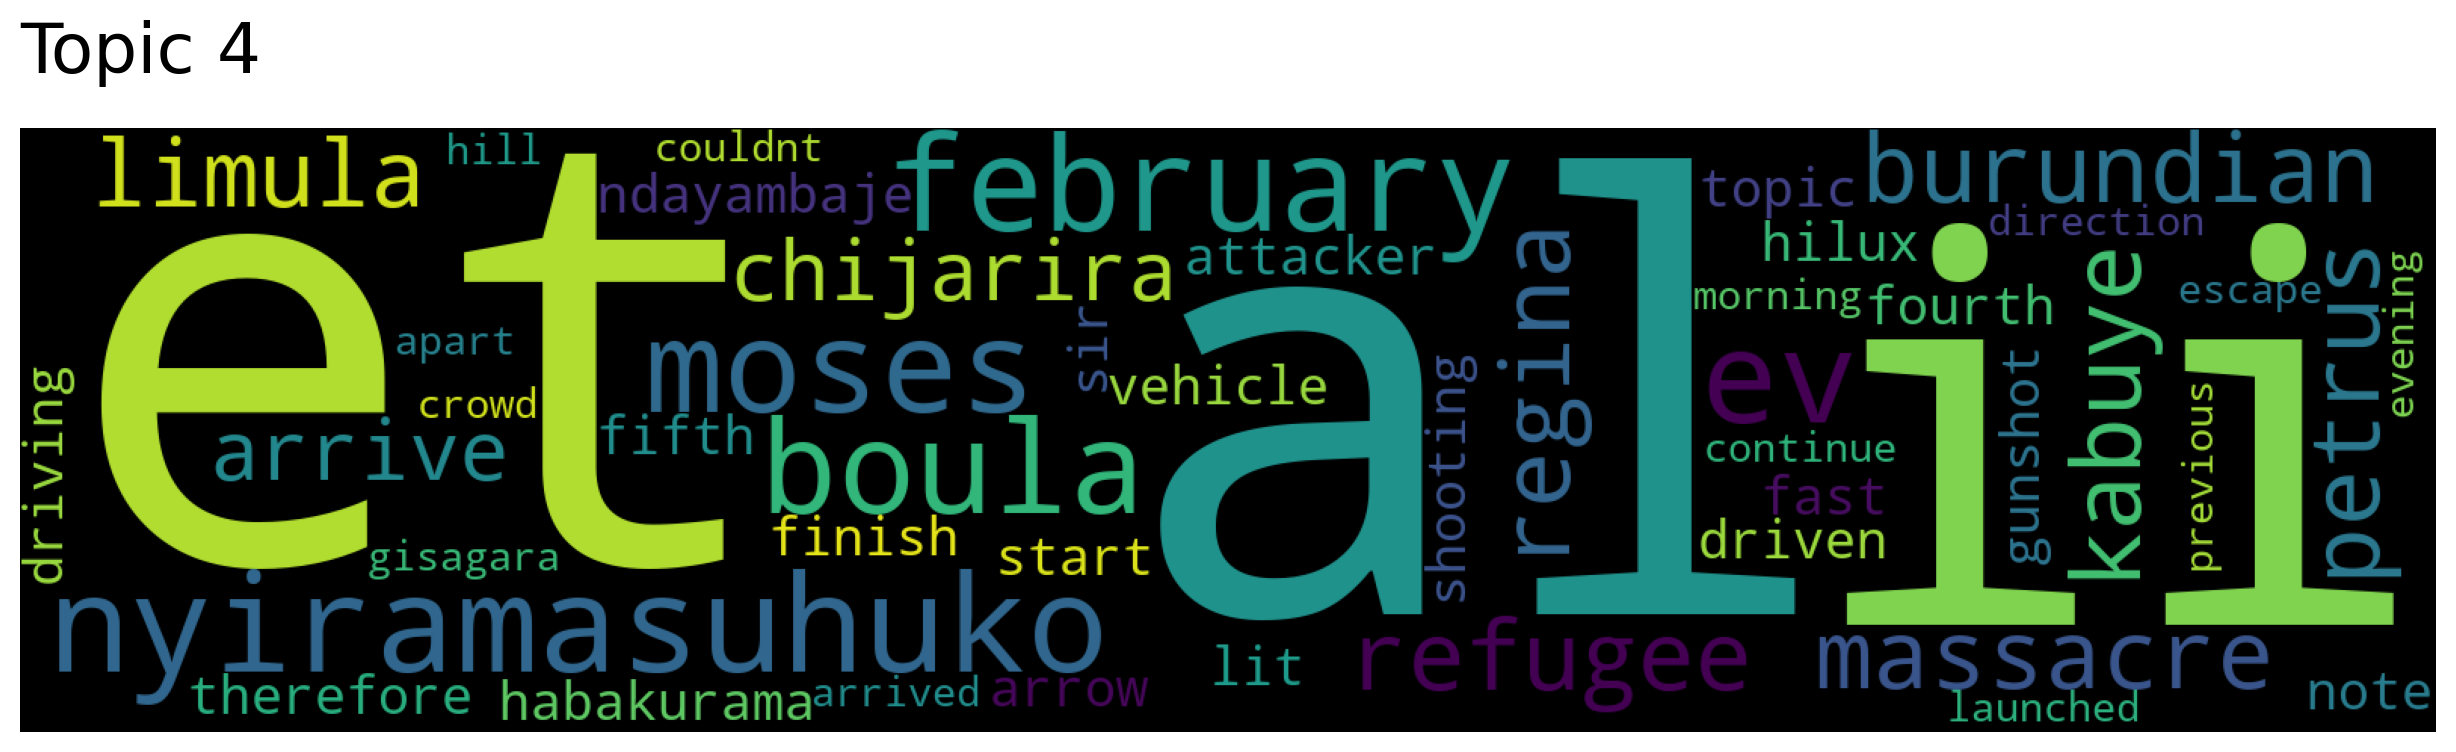

In [100]:
topic_sizes, topic_nums = model.get_topic_sizes()
print(f"Topic sizes {topic_sizes}")
print(f"Topic nums {topic_nums}")

# Get Topics
topic_words, word_scores, topic_nums = model.get_topics(num_topics)
print(f"Topic words {topic_words}")

for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [101]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3, num_docs=3)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print("#####################################################################################")
    print(f"Document: {doc_id}, Score: {score}")
    print("######################")
    print(doc)
    print("--------------------------------")
    print(df_violent.iloc[doc_id])
    print("######################")
    print()

#####################################################################################
Document: 204, Score: 0.8508616089820862
######################
five bullet inside body serbian doctor taken four bullet one left body bad condition q ethnic group page q spent day pista taken muslim day pista taken repair building q ask question would ask know dule tadic yes q first meet met early q meet prijedor q circumstance meet work meeting held month usually occasion visit policeman individual station used opportunity would come hour two earlier would chat drink two meeting occasion met dusko tadic friend q friend introduced von httpswww icty orgxcasestadictransen htm coworker q name emir karabasic introduce good friend q emir karabasic introduced dusko tadic q first occasion dusko tadic long occasion last sat together
--------------------------------
had five bullets inside his body Serbian doctors had taken out four of those bullets but one was left in his body So he was in a very very bad co